In [1]:
import sys  
sys.path.insert(0, '../py')
from graviti import *

from numpy.linalg import norm
import numpy as np
import os
import os.path
from os import path
import sys
import glob
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('Agg')
import plotly.graph_objects as go
from plotly.graph_objs import *
import plotly.express as px
import hdbscan
import pandas as pd
import umap
import networkx as nx
from scipy import sparse, linalg
import pickle
from sklearn.preprocessing import normalize, scale
from scipy.sparse import find
from numpy.linalg import norm
import timeit
import multiprocessing
from joblib import Parallel, delayed
from datetime import datetime
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KDTree
from sklearn.neighbors import NearestNeighbors

In [20]:
sample = glob.glob('../data/TCGA-38-4627-01Z-00-DX1.fe406eb9-b38b-410d-aa1a-84ab8ac091c7.svs.tar.gz/TCGA-38-4627-01Z-00-DX1.nuclei945869.size9458.covdNN50.features.pkl')
df = pd.read_pickle(sample[0])
df['entropy'] = df['entropy'].astype(float)
df.head()

,centroid_x,centroid_y,area,eccentricity,orientation,perimeter,solidity,circularity,covd,entropy,descriptor,heterogeneity
219851,128896,46622,16.0,0.925078,1.343997,12.828427,1.000000,1.221752,1,1.747271,"[-0.1244245757683453, 0.2256738511413455, -0.2...",1.775446
230930,15036,14211,484.0,0.696375,1.168365,83.597980,0.962227,0.870289,1,1.752844,"[-0.11399732776468822, -0.2225502555958601, 0....",1.967034
259523,7897,14945,260.0,0.942040,-1.553324,69.798990,0.945455,0.670633,1,1.771757,"[-0.07889619838790621, 0.22558627767688227, -0...",1.542198
613421,72103,31380,239.0,0.691379,-0.341999,62.041631,0.919231,0.780264,1,1.755372,"[-0.05415368600824071, 0.22770419552680854, 0....",1.176843
488185,125975,33588,150.0,0.861938,-0.620715,48.284271,0.974026,0.808518,1,1.732339,"[-0.07601088446977557, 0.23826643190395394, 0....",1.176849


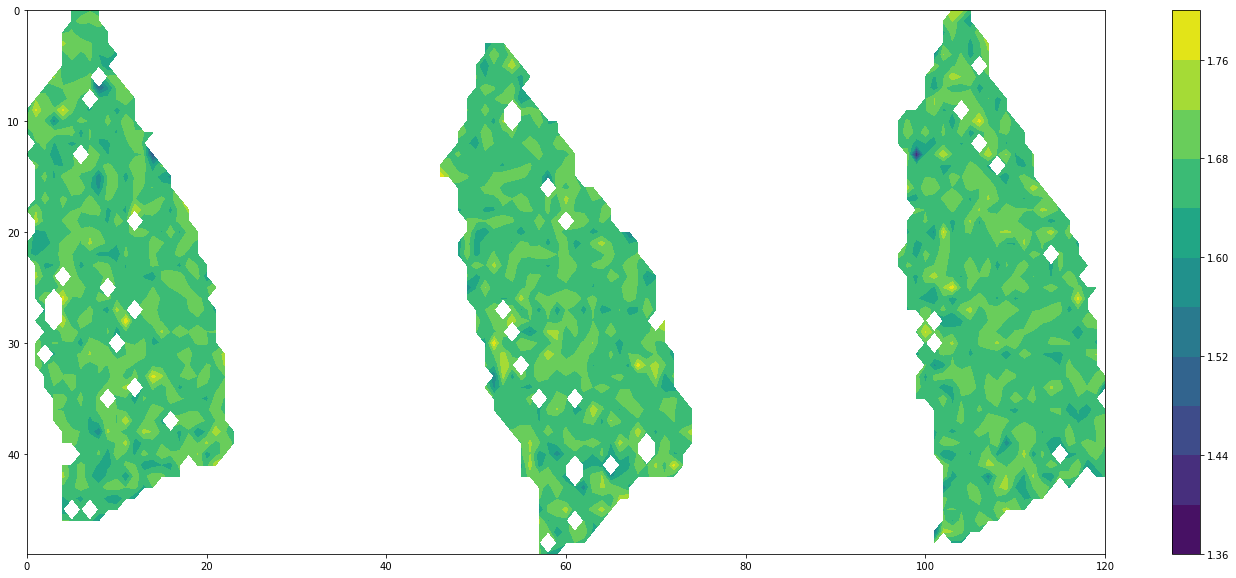

In [24]:
contourPlot(df,'entropy',50,np.mean,10,plt.cm.viridis,'test')

In [ ]:
df['quantile'] = pd.qcut(df.heterogeneity , 4, labels=False)

levels = 100
bins = 100
cmap = plt.cm.viridis

for q in range(4):
    contourPlot(df[df['quantile']==q],bins,np.mean,levels,cmap,'test')

In [ ]:
samples = glob.glob('../data/heterogeneity_data/*.pkl')    

barycenters = np.zeros((len(samples),pd.read_pickle(samples[0])['descriptor'].iloc[0].shape[0]))
row = 0
for sample in samples[:]:
    print(row)
    df = pd.read_pickle(sample)
    barycenter = df[df['covd']==1]['descriptor'].mean()
    barycenters[row,:] = barycenter
    row += 1

import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(barycenters)
embedding.shape

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    )
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the LUAD dataset', fontsize=24)

In [ ]:
# To summarize the 5-point statistics of each samples in a given cancer type
df_summary = pd.DataFrame()
for sample in samples[:]:
    df = pd.read_pickle(sample)
    summary = df['heterogeneity'].describe().to_frame().transpose()
    df_summary = pd.concat([df_summary, summary])

df_summary.hist(bins=20,figsize=(10,10))

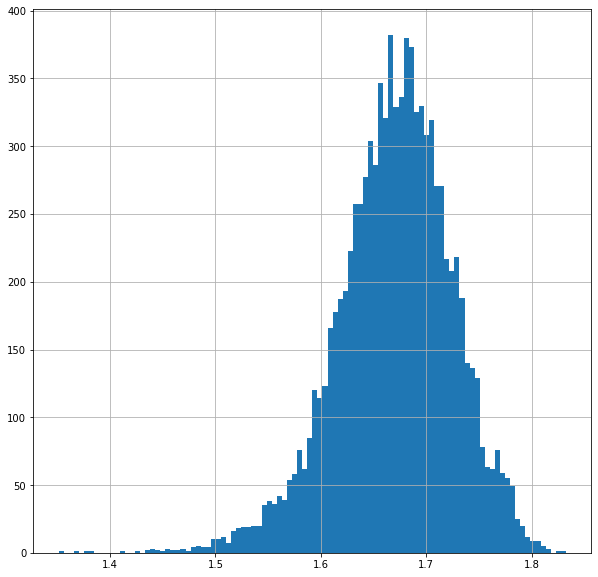

In [25]:
df['entropy'].hist(figsize=(10,10),bins=100)